# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN

from keras.preprocessing.text import Tokenizer
import keras
from keras.models import Sequential
from keras.layers import LSTM, Embedding, GRU
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam

### 1.1 Generating dataset

In [ ]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [ ]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [ ]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
no_training_epochs = 5

### 1.3 Data examination

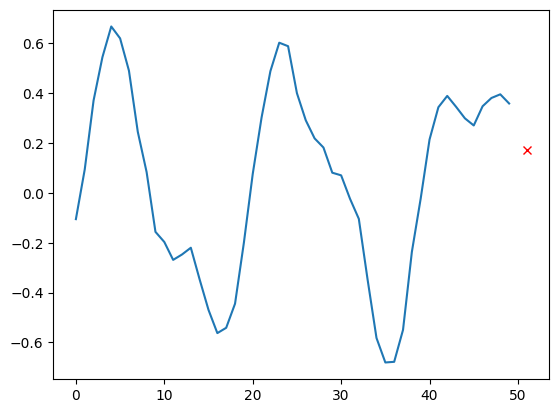

In [ ]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [ ]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [ ]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [ ]:
model_linear.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 1s 5ms/step - loss: 0.1401 - mean_squared_error: 0.1401 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 2/5
219/219 [==============================] - 1s 5ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0097 - val_mean_squared_error: 0.0097


In [ ]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

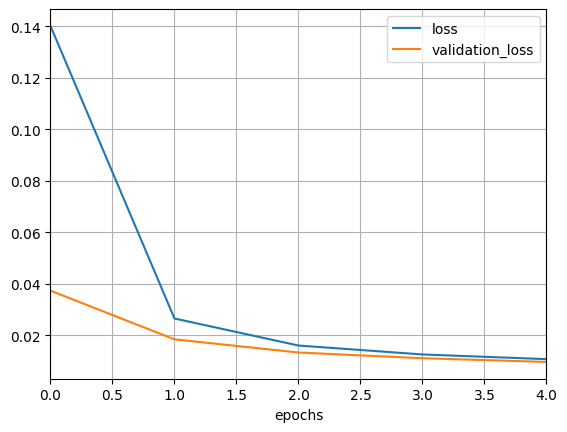

In [ ]:
plot_function(history_linear)

In [ ]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.00971224345266819
Test MSE:  0.00971224345266819


### 1.5 Simple RNN Model

In [ ]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [ ]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 8s 30ms/step - loss: 0.1231 - mean_squared_error: 0.1231 - val_loss: 0.1075 - val_mean_squared_error: 0.1075
Epoch 2/5
219/219 [==============================] - 7s 30ms/step - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0788 - val_mean_squared_error: 0.0788
Epoch 3/5
219/219 [==============================] - 7s 32ms/step - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 4/5
219/219 [==============================] - 6s 28ms/step - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 5/5
219/219 [==============================] - 7s 32ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0201 - val_mean_squared_error: 0.0201


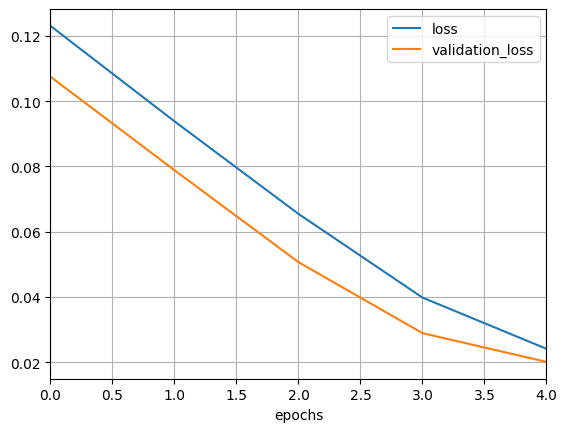

In [ ]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [ ]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [ ]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [ ]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 28s 115ms/step - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 2/5
219/219 [==============================] - 26s 118ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 3/5
219/219 [==============================] - 25s 114ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/5
219/219 [==============================] - 25s 113ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/5
219/219 [==============================] - 25s 113ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


In [ ]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003416609251871705
Test MSE:  0.003416609251871705


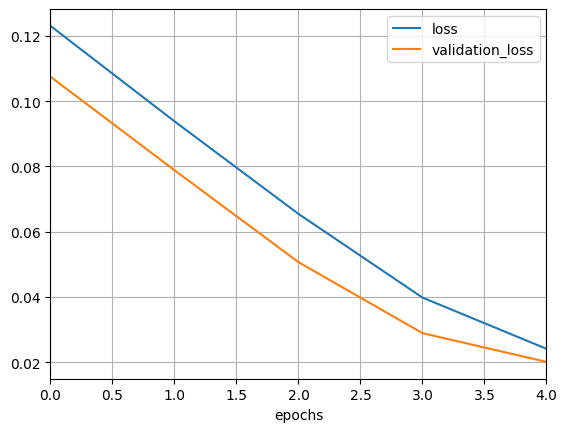

In [ ]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [ ]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


### 2.2 - Dataset examination

In [ ]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [ ]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [ ]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [ ]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [ ]:
optimizer = Adam(learning_rate = 0.001)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 154s 241ms/step - loss: 0.7023 - accuracy: 0.5091 - val_loss: 0.6906 - val_accuracy: 0.5310
Epoch 2/5
625/625 [==============================] - 134s 214ms/step - loss: 0.6956 - accuracy: 0.5267 - val_loss: 0.7249 - val_accuracy: 0.4938
Epoch 3/5
625/625 [==============================] - 128s 204ms/step - loss: 0.6899 - accuracy: 0.5253 - val_loss: 0.7112 - val_accuracy: 0.4958
Epoch 4/5
625/625 [==============================] - 131s 209ms/step - loss: 0.6798 - accuracy: 0.5541 - val_loss: 0.7113 - val_accuracy: 0.5004
Epoch 5/5
625/625 [==============================] - 128s 206ms/step - loss: 0.6668 - accuracy: 0.5745 - val_loss: 0.7287 - val_accuracy: 0.5058


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.7273750901222229
Test accuracy:  50.568002462387085 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

# *LSTM*

In [ ]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [ ]:
optimizer = Adam(learning_rate = 0.001)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 47s 70ms/step - loss: 0.6903 - accuracy: 0.5305 - val_loss: 0.6857 - val_accuracy: 0.5452
Epoch 2/5
625/625 [==============================] - 14s 23ms/step - loss: 0.6495 - accuracy: 0.6130 - val_loss: 0.6723 - val_accuracy: 0.5916
Epoch 3/5
625/625 [==============================] - 11s 18ms/step - loss: 0.6626 - accuracy: 0.5831 - val_loss: 0.6842 - val_accuracy: 0.5492
Epoch 4/5
625/625 [==============================] - 11s 18ms/step - loss: 0.6652 - accuracy: 0.5983 - val_loss: 0.5997 - val_accuracy: 0.6852
Epoch 5/5
625/625 [==============================] - 11s 17ms/step - loss: 0.4606 - accuracy: 0.7918 - val_loss: 0.4611 - val_accuracy: 0.7906


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.45583057403564453
Test accuracy:  79.32800054550171 %


# *GRU*

In [ ]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [ ]:
optimizer = Adam(learning_rate = 0.001)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 38s 55ms/step - loss: 0.6606 - accuracy: 0.5821 - val_loss: 0.5226 - val_accuracy: 0.7586
Epoch 2/5
625/625 [==============================] - 13s 21ms/step - loss: 0.4220 - accuracy: 0.8096 - val_loss: 0.4063 - val_accuracy: 0.8168
Epoch 3/5
625/625 [==============================] - 11s 18ms/step - loss: 0.3626 - accuracy: 0.8428 - val_loss: 0.4024 - val_accuracy: 0.8162
Epoch 4/5
625/625 [==============================] - 10s 16ms/step - loss: 0.3339 - accuracy: 0.8522 - val_loss: 0.3945 - val_accuracy: 0.8266
Epoch 5/5
625/625 [==============================] - 10s 16ms/step - loss: 0.3123 - accuracy: 0.8654 - val_loss: 0.3781 - val_accuracy: 0.8308


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.3658130466938019
Test accuracy:  83.69200229644775 %
